# Dota2 Prediction System 
### Final project of CS-480
#### Team members: Aaron Deng (CSU ID: 830888654), Haoman Liu (CSU ID: 830878658)

This project is about to make a prediction system that can predict the results of games if the heros pick of two teams are given. The data is collected from https://www.kaggle.com/devinanzelmo/dota-2-matches and the non-linear classification algorithms are used in this program, such as LDA and Neural Network. The final result will be shown by displaying two teams and who wins the game.

What we did:

    Aaron Deng (design code part): 
    Pre-processing the data, designing the codes and programming, evaluating and retraining the training model

    Haoman Liu (participate in coding and design display part): 
    Participate in Pre-processing the data and evaluating the results, collecting the data on the website, design the  frame of software display

## Introduction

Dota2 is a great game that has attracted a large number of people for a decade. Each Dota 2 match consists of two teams of five players pitted against each other. Before a match begins, each player selects a character to play as, known as a “hero” from a pool of 106 different heroes. Once a player chooses a hero, no other player can select that hero for the same match. Heroes have a wide-range of characteristics and abilities that, combined with the massive hero pool, make each match unique.

Dota2 is so complicated that it is more like a professional sport, instead of just a simple game that everyone can play well, so as this game developing, the analysis of what heros that two teams should pick and how different hero picks will affect to the result becomes more and more important to a game.So that is why I decide to make a prediction system to assist professional players to pick heros.

The data are collected from https://www.kaggle.com/devinanzelmo/dota-2-matches. This website contains thousands of games results of Dota2, including match number, players ID, the hero picks, and other important details.

The machine learning approaches I used include LDA classification and neural network classification algorithms. Beside the game result prediction, the report will also has some observations of different classification algorithms, like the errors comparison and the improvement of various parameters setting.

## Method

### Data Source

The data is acquired from website https://www.kaggle.com/devinanzelmo/dota-2-matches, and there are 19 files including all of the important informations that are related to the Dota2 games. In order to achieve the goal of building a game results prediction system, three files are downloaded and processed - that are 'hero_names.csv', 'match.csv', and 'players.csv'.

Here are some process of data management:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neuralnetworks as nn
import mlutils as ml
import qdalda as ql
%matplotlib inline

#### 1. Hero_names.csv

The 'hero_names.csv' includes all of the Dota2 hero names and their ID numbers. Because all of other files are using hero's ID numbers to store the relevant informations, we need to change hero's ID numbers to their real names, in order to have a more obvious view of the advantage or disadvantage of two teams' hero-pick.

In [52]:
# Import the data file
hero_names = []
with open('/Users/yinzhideng/Documents/CS480/Dota2_Prediction/hero_names.csv') as f:
    for line in f:
        hero_names.append(line.strip().split(','))

In [53]:
# Have a preview of data
hero_names[0:9]

[['name', 'hero_id', 'localized_name'],
 ['npc_dota_hero_antimage', '1', 'Anti-Mage'],
 ['npc_dota_hero_axe', '2', 'Axe'],
 ['npc_dota_hero_bane', '3', 'Bane'],
 ['npc_dota_hero_bloodseeker', '4', 'Bloodseeker'],
 ['npc_dota_hero_crystal_maiden', '5', 'Crystal Maiden'],
 ['npc_dota_hero_drow_ranger', '6', 'Drow Ranger'],
 ['npc_dota_hero_earthshaker', '7', 'Earthshaker'],
 ['npc_dota_hero_juggernaut', '8', 'Juggernaut']]

As the data shown above, the first row that is the attribute name and the first column are useless, so we need to delete them.

In [54]:
hero_names = np.asarray(hero_names)[1:,1:] # delete the first row and column
hero_names[0:9, :]

array([['1', 'Anti-Mage'],
       ['2', 'Axe'],
       ['3', 'Bane'],
       ['4', 'Bloodseeker'],
       ['5', 'Crystal Maiden'],
       ['6', 'Drow Ranger'],
       ['7', 'Earthshaker'],
       ['8', 'Juggernaut'],
       ['9', 'Mirana']], 
      dtype='<U33')

In [55]:
hero_names.shape

(112, 2)

In [56]:
# now the hero's name will be shown if the ID is given
# for example
hero_id = 6
heroname = hero_names[hero_id - 1, 1] # the ID number - 1 will be the index of hero's name
print(heroname)

Drow Ranger


#### 2. Players.csv

For 'players.csv' file, after the preview of it, we know that the first row is the attribute names, which includes almost of the detailed data of games, such as match ID, hero ID (heros that used in this game), account ID (players' ID that attend to this game), gold (gold acquired by each player), and etc.

In [6]:
players = []
with open('/Users/yinzhideng/Documents/CS480/Dota2_Prediction/players.csv') as f:
    for line in f:
        players.append(line.strip().split(','))

In [7]:
players = players[1:] # delete the first row of attribute names
players = np.asarray(players) # convert list to numpy array

In [8]:
# the attributes are too many while we just need two columns of it
# the matchs' IDs and heros' IDs
matchID_heroID = players[:, (0,2)]
matchID_heroID = matchID_heroID.astype(int)

In [9]:
# first column is the 5000 matchs' IDs that expand to 50000 because there are ten players in a game
# second column is the heros' IDs
matchID_heroID

array([[    0,    86],
       [    0,    51],
       [    0,    83],
       ..., 
       [49999,    90],
       [49999,    73],
       [49999,    53]])

#### 3. Match.csv 

In 'match.csv' file, several informations of two teams in a game are given, like match ID, game modes, tower status of two teams, and the most important one - if team radian wins, that is shown as 'True' or 'False'. We will use two attributes of this file, the match IDs and the status of radian wins, to build the target values - the results of games.

In [10]:
match = []
with open('/Users/yinzhideng/Documents/CS480/Dota2_Prediction/match.csv') as f:
    for line in f:
        match.append(line.strip().split(','))

In [11]:
# delete the first row, which is the attribute names, and convert it from list to numpy array
match = np.asarray(match[1:])
# use the first column and the tenth column, that are match IDs and status of radian wins
match_result = match[:, (0, 9)]

In [12]:
match_result

array([['0', 'True'],
       ['1', 'False'],
       ['2', 'False'],
       ..., 
       ['49997', 'True'],
       ['49998', 'True'],
       ['49999', 'False']], 
      dtype='<U10')

### Build input data and target value

We decide the input data will include ten columns that one row has ten heros attending in one games, the first five columns are set as the hero IDs of team radian and five columns left are set as the hero IDs of team dire. For target value - T, it will be set as '0' or '1'. '0' represents team radian loses and team dire wins, and '1' represents team radian wins and team dire loses.

#### 1. Input data

In [13]:
hero_pick = []
for x in range(matchID_heroID.shape[0]):
    hero_pick.append(matchID_heroID[x, 1])
hero_pick = np.asarray(hero_pick)
hero_pick = hero_pick.reshape((int(hero_pick.shape[0]/10), 10)) # let each row includes all the heros of a game
hero_pick

array([[ 86,  51,  83, ...,  46,   7,  73],
       [  7,  82,  71, ...,   5,  67, 106],
       [ 51, 109,   9, ...,  10,  12,  85],
       ..., 
       [100,  68,  75, ...,  21,   9,  23],
       [ 56,  50,   2, ...,  29,  44,   3],
       [ 94,  19,  68, ...,  90,  73,  53]])

In [14]:
# if we want to see the hero-picks in one game, we can do:
gameID = 1
second_game = hero_pick[gameID]
for i in range(10):
    print(hero_names[second_game[i] - 1, 1])

# the first five heros are in team radian and other five heros are in team dire

Earthshaker
Treant Protector
Gyrocopter
Venomancer
Windranger
Invoker
Zeus
Crystal Maiden
Ancient Apparition
Earth Spirit


#### 2. Target values

In this part, we decide to use the second column of match_result, which are represented as 'True' or 'False'. We are not necessary to deal with the first column, the match IDs, because the match IDs have been already matched exactly. However, we still need to convert the 'True' and 'False' into '1' and '0', so that we can do analysis and processing using machine learning algorithms.

In [15]:
game_results = match_result[:,1:]
print(game_results)
for i in range(game_results.shape[0]):
    if game_results[i, 0] == 'True':
        game_results[i, 0] = 1
    else:
        game_results[i, 0] = 0
game_results = game_results.astype(int)
game_results

[['True']
 ['False']
 ['False']
 ..., 
 ['True']
 ['True']
 ['False']]


array([[1],
       [0],
       [0],
       ..., 
       [1],
       [1],
       [0]])

## Required functions

Because the purpose of this project mainly is applying classification algorithms of machine learning approaches that I learnt on the class and tried on previous assignments on the data of Dota2 game results. So several various classification algorithms will be used, like LDA classification, and non-linear classification using neural network.

### 1. LDA

In [16]:
import numpy as np
import sys # for sys.float_info.epsilon

######################################################################
### class QDA
######################################################################

class LDA(object):
    
    def __init__(self):
        # Define all instance variables here. Not necessary
        self.means = None
        self.stds = None
        self.mu = None
        self.sigma = None
        self.sigmaInv = None
        self.prior = None
        self.determinant = None
        self.discriminantConstant = None

    def train(self,X,T):
        self.classes = np.unique(T)
        self.means, self.stds = np.mean(X,0), np.std(X,0)
        Xs = (X - self.means) / self.stds
        self.mu = []
        self.sigma = []
        self.sigmaInv = []
        self.determinant = []
        self.prior = []
        nSamples = X.shape[0]
        for k in self.classes:
            rowsThisClass = (T == k).reshape((-1))
            self.mu.append( np.mean(Xs[rowsThisClass,:],0).reshape((-1,1)) )
            self.sigma.append( np.cov(Xs[rowsThisClass,:],rowvar=0) )
            if self.sigma[-1].size == 1:
                self.sigma[-1] = self.sigma[-1].reshape((1,1))
            det = np.linalg.det(self.sigma[-1])
            if det == 0:
                det = sys.float_info.epsilon
            self.determinant.append( det )
            self.sigmaInv.append( np.linalg.pinv(self.sigma[-1]) )    # pinv in case Sigma is singular
            self.prior.append( np.sum(rowsThisClass) / float(nSamples) )
        self._finishTrain()

    def _finishTrain(self):
        self.sigmaMean = np.sum(np.stack(self.sigma) * np.array(self.prior)[:,np.newaxis,np.newaxis], axis=0)
        self.sigmaMeanInv = np.linalg.pinv(self.sigmaMean)
        # print(self.sigma)
        # print(self.sigmaMean)
        self.discriminantConstant = []
        self.discriminantCoefficient = []
        for ki in range(len(self.classes)):
            sigmaMu = np.dot(self.sigmaMeanInv, self.mu[ki])
            self.discriminantConstant.append( -0.5 * np.dot(self.mu[ki].T, sigmaMu) )
            self.discriminantCoefficient.append( sigmaMu )
    
    def _discriminantFunction(self,Xs):
        D = Xs.shape[0]
        nSamples = Xs.shape[0]
        discriminants = np.zeros((nSamples, len(self.classes)))
        for ki in range(len(self.classes)):
            discriminants[:,ki:ki+1] = self.discriminantConstant[ki] + \
                                       np.dot(Xs, self.discriminantCoefficient[ki])
        probabilities = np.exp( discriminants - 0.5*D*np.log(2*np.pi) - 0.5*np.log(self.determinant[ki]) \
                               - 0.5*np.sum(np.dot(Xs,self.sigmaMeanInv) * Xs, axis=1).reshape((-1,1)))
        return discriminants, probabilities
    def use(self,X):
        nSamples = X.shape[0]
        Xs = (X - self.means) / self.stds
        discriminants,probabilities = self._discriminantFunction(Xs)
        predictedClass = self.classes[np.argmax( discriminants, axis=1 )]
        predictedClass = predictedClass.reshape((-1,1))
        D = X.shape[1]
        return predictedClass,probabilities,discriminants
        
    def __repr__(self):
        if self.mu is None:
            return 'QDA not trained.'
        else:
            return 'QDA trained for classes {}'.format(self.classes)

In [17]:
def trainLDA(X,T,parameters = None):
    lda = LDA()
    lda.mu = parameters
    lda.train(X,T)
    return lda

In [18]:
def evaluateLDA(model,X,T):
    pClass,prob,disc = model.use(X)
    #percentCorrect = np.sum(T==pClass) / float(T.shape[0]) * 100
    return np.sum(T==pClass) / float(T.shape[0]) * 100

### 2. Neural network classifier

In [19]:
def trainNN(X,T,parameters):
    # the layer number of the inputs and the outputs depends on their elements
    input_layer = X.shape[1]
    output_layer = len(np.unique(T))
    nnet = nn.NeuralNetworkClassifier(input_layer,parameters[0],output_layer)
    #nnet = nn.NeuralNetwork(1,parameters[0],1)
    return nnet.train(X, T, nIterations=parameters[1])

In [20]:
def evaluateNN(model,X,T):
    predict = model.use(X)
    #error = np.sqrt(np.mean((predict - T) ** 2))
    #for k in range(len(model)):
    #    model[k] = int(model[k])
    return np.sum(predict==T) / float(len(T)) * 100

### 3. Other useful functions

In [21]:
def printResults(label,results):
    print('{:4s} {:>20s}{:>8s}{:>8s}{:>8s}'.format('Algo','Parameters','TrnAcc','ValAcc','TesAcc'))
    print('-------------------------------------------------')
    for row in results:
        # 20 is expected maximum number of characters in printed parameter value list
        print('{:>4s} {:>20s} {:7.2f} {:7.2f} {:7.2f}'.format(label,str(row[0]),*row[1:]))

## Results

In [22]:
# establish input data X and target value T
X = hero_pick
T = game_results

### 1. Recommand hero-pick

In Dota2 professional games, we usually use a game mode called captain mode, which means each team has a captain and all of the hero-pick are decided by this team captain. So, in this part, we want to give a recommandation hero-pick choices that will increase the win rate to the captain before the game start.

To achieve it, we need to collect the hero-pick of all the team radian if the results show they win, also collect the hero-pick of all the team dire if the results show they win.

In [23]:
# if team radian wins, store the hero IDs of first five columns
X_radianwin = X[np.where(np.any(T == 1, axis = 1))][:, 0:5]
# if team dire wins, store the hero IDs of last five columns
X_direwin = X[np.where(np.any(T == 0, axis = 1))][:, 5:]
X_radianwin.shape, X_direwin.shape, X.shape

((25943, 5), (24057, 5), (50000, 10))

In [24]:
# combine the hero-pick of high win rate together
X_win = np.append(X_radianwin, X_direwin, axis = 0)[:,0]
# find which five heros appears the most
hero_freq = np.bincount(X_win)
hero_recom = []
for i in range(5):
    index = np.argmax(hero_freq)
    hero_recom.append(index)
    hero_freq[index] = 0
print(hero_recom)
for i in range(5):
    print(hero_names[hero_recom[i] - 1, 1])

[21, 11, 74, 28, 7]
Windranger
Shadow Fiend
Silencer
Tidehunter
Earthshaker


As we see, the recommanded hero-pick will be 'windrange, shadow fiend, silencer, tidehunter, earthshaker', which are pretty convincible. On my opinion, as a experienced Dota player, this is indeed is a good choice of hero-pick.

### 2. Game result prediction

In this part, our goal is to make a good prediction of a game if the hero-pick of both two teams are given. To achieve it, we need to apply different classiication algorithms on the data to train a effective model.

#### Apply LDA

In [25]:
# like I did in previous assignment, use trainValidateTestKFoldsClassification function to see the result
resultsLDA = ml.trainValidateTestKFoldsClassification( trainLDA,evaluateLDA, X,T, [None],
                                                       nFolds=6, shuffle=False,verbose=False)
printResults('LDA:',resultsLDA)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   50.69   50.40   50.56
LDA:                 None   50.45   50.31   50.59
LDA:                 None   51.02   50.58   50.62
LDA:                 None   50.65   50.43   50.44
LDA:                 None   50.39   50.37   50.05
LDA:                 None   50.71   50.51   50.15


In [26]:
results = np.asarray(resultsLDA)

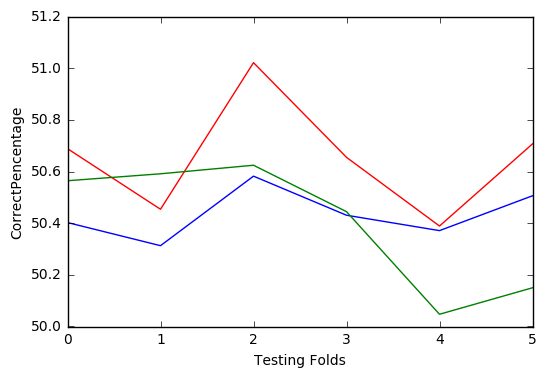

In [27]:
xaxis = range(len(results))
plt.plot(xaxis,results[:,1],'r-',label='TrnAcc')
plt.plot(xaxis,results[:,2],'b-',label='ValAcc')
plt.plot(xaxis,results[:,3],'g-',label='TesAcc')
plt.xlabel('Testing Folds')
plt.ylabel('CorrectPencentage')

From the list and the plot of the result, it seems the success rate of the train model using LDA classification is not high enough and stay stably around 50%. What is more, changing the number of folds does no help to increase the success rate.

#### Apply neural network classifier

In [28]:
resultsNN1 = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                     [ [ [0], 10], [[0], 200]],
                                                     nFolds=6, shuffle=False,verbose=False)
printResults('NN:',resultsNN1)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:            [[0], 10]   76.39   72.44   86.62
 NN:            [[0], 10]   77.54   72.89   84.36
 NN:            [[0], 10]   78.58   73.52   81.18
 NN:            [[0], 10]   79.52   74.48   76.39
 NN:            [[0], 10]   80.39   76.09   68.33
 NN:            [[0], 10]   81.18   79.38   51.91


In [29]:
resultsNN2 = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                     [ [ [0], 10], [[50], 10]],
                                                     nFolds=6, shuffle=False,verbose=False)
printResults('NN:',resultsNN2)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:            [[0], 10]   76.39   72.44   86.62
 NN:            [[0], 10]   77.54   72.89   84.36
 NN:            [[0], 10]   78.58   73.52   81.18
 NN:            [[0], 10]   79.52   74.48   76.39
 NN:            [[0], 10]   80.39   76.09   68.33
 NN:            [[0], 10]   81.18   79.38   51.91


In [30]:
resultsNN3 = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                     [ [ [0], 10]],
                                                     nFolds=3, shuffle=False,verbose=False)
printResults('NN:',resultsNN3)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:            [[0], 10]   61.80   59.64   76.39
 NN:            [[0], 10]   68.32   63.52   68.32
 NN:            [[0], 10]   72.94   72.36   51.89


In [31]:
resultsNN4 = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                     [ [ [0], 10]],
                                                     nFolds=10, shuffle=False,verbose=False)
printResults('NN:',resultsNN4)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:            [[0], 10]   84.36   79.71   91.52
 NN:            [[0], 10]   84.65   79.81   90.66
 NN:            [[0], 10]   84.93   79.92   89.62
 NN:            [[0], 10]   85.19   80.07   88.31
 NN:            [[0], 10]   85.45   80.26   86.62
 NN:            [[0], 10]   85.70   80.51   84.36
 NN:            [[0], 10]   85.94   80.86   81.19
 NN:            [[0], 10]   86.17   81.39   76.40
 NN:            [[0], 10]   86.40   82.29   68.34
 NN:            [[0], 10]   86.62   84.11   51.92


For the neural network classifier algorithm, I modified the parameter set to see which one will be the best. First, I maintained the hidden layers and set iteration number as 10 and 200, and the fold number are increased from 1 to 6. The result shows the parameter set [[0], 10] is the best when the fold number is 1. In addition, from the correct rate of the test data is reduced as the fold number is increased.

Then, I maintain the iteration number stably as 10 and change the hidden layer number, the result was absolutely same. The parameter set [[0], 10] is always the best.

Last, I set parameter set as [[[0], 10]] but modifying the fold number as 3 and 10, in order to see if the fold number will affect the correct rate. Depend on the previous knowledge, higher the fold number, higher the correct rate will be. Like our assumption, when the fold number is 10, the correct rate of test fold will reach 91.52%, that is a very good result.

In [32]:
results = np.asarray(resultsNN4)

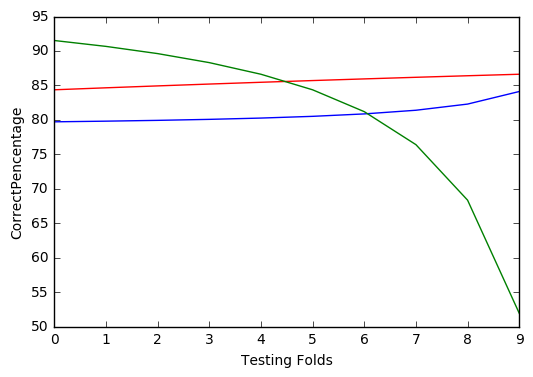

In [33]:
xaxis = range(len(results))
plt.plot(xaxis,results[:,1],'r-',label='TrnAcc')
plt.plot(xaxis,results[:,2],'b-',label='ValAcc')
plt.plot(xaxis,results[:,3],'g-',label='TesAcc')
plt.xlabel('Testing Folds')
plt.ylabel('CorrectPencentage')

The plot shows that as the fold numbers increasing, the correct rates of the train and validate fold are increased slightly, while for the test fold, the correct rate reaches the highest when it is 0. This tells us when the test fold is the first fold, the correct rate will be the best.

#### Training model using best parameter

In [38]:
train_num = int((9 / 10) * X.shape[0]) # fold number is 10
# establish training data and testing data
X_train = X[0: train_num, :]
T_train = T[0: train_num, :]
X_test = X[train_num: , :]
T_test = T[train_num: , :]

In [49]:
model = trainNN(X_train, T_train, [[10], 200])
predict = model.use(X_test)
print(T_test[0:49, 0])
print(predict[0:49, 0])

[0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 1 1 1 1 0 0]
[1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 1 1 1 1 0 0 1 0 1 1 0]


Then try a random hero-pick of two teams to see the prediction result.

In [80]:
hero_range = np.arange(112)
np.random.shuffle(hero_range) # build a non-repetitive random int array for the random hero-pick
given_heropick = hero_range[0:10].reshape((1, 10)) # only use the first ten int because two teams use only ten heros
#print(given_heropick)
for i in range(10):
    if i == 0:
        print('Team Radian:')
    if i == 5:
        print('\n')
    if i == 5:
        print('Team Dire:')
    print(hero_names[given_heropick[0,i], 1])
#print(given_heropick.shape)
predict_result = model.use(given_heropick)
print(predict_result)
if predict_result == 1:
    print('Radian win')
else:
    print('Dire win')

[[ 62  88  83 101 108  32  61  15 105 109]]
Team Radian:
Jakiro
Keeper of the Light
Undying
Elder Titan
Phoenix


Team Dire:
Tinker
Weaver
Sand King
Earth Spirit
Oracle
[[0]]
Dire win


In [81]:
hero_range = np.arange(112)
np.random.shuffle(hero_range) # build a non-repetitive random int array for the random hero-pick
given_heropick = hero_range[0:10].reshape((1, 10)) # only use the first ten int because two teams use only ten heros
#print(given_heropick)
for i in range(10):
    if i == 0:
        print('Team Radian:')
    if i == 5:
        print('\n')
    if i == 5:
        print('Team Dire:')
    print(hero_names[given_heropick[0,i], 1])
#print(given_heropick.shape)
predict_result = model.use(given_heropick)
print(predict_result)
if predict_result == 1:
    print('Radian win')
else:
    print('Dire win')

Team Radian:
Dazzle
Silencer
Lycan
Drow Ranger
Riki


Team Dire:
Phantom Lancer
Bane
Techies
Rubick
Queen of Pain
[[1]]
Radian win


From this results, we can see the prediction is pretty reasonable, due to my experience of Dota2.

## Conclusion

In this project, I built a Dota2 results prediction system, which can help the professional players to have a good knowledge of their hero-pick and the most possible result of the game. This could be used as giving the hero-pick decision that the captain wants to make, and this prediction system will give a possible result that can help the captain adjust his decision and increase the win rate. In addition, this prediction system also can give a recommandation hero-pick to the team captains assisting them to choose the high-win-rate hero first if it is not been banned. Choosing a high-win-rate hero will do a great help to increase the win rate of your team.

To achieve it, I collected 50000 samples of Dota2 games to build a training model. And I use some different classification algorithms of machine learning that I have learnt on class, like LDA classification and neural network classifier. I compared these various algorithms to find which one fit the data better. Beside, focusing on neural network classifier, I also modified the parameter set and fold numbers, in order to find the best parameter set and use them to establish train model.

From all of the work I did, I have a deeper understanding of the differences of different classification algorithm. I know the best algorithm will various if various data are studied. For example, for the data that has a good linearity, linear classification algorithm will be a better choice. While for the data of Dota2 game, a non-linear classification algorithm like neural network classifier will be a better choice, because the relationship between hero IDs and results is obviously non-linear.

What's more, the effect of modification of parameters is significant to the training model. Like the comparison I did in this project, the range of win rate is large if parameter set is different.

In conclusion, in the future study of machine learning, I will have a further and better study of the effect of various algorithms on different data.

*Machine learning is so cool and so interesting!*